# TP N° 1: Análisis Exploratorio de Datos
## Heart Diseases Dataset
Este conjunto de datos es una versión avanzada del clásico conjunto de datos de enfermedades cardíacas de UCI Machine Learning, enriquecido con más características para soportar análisis más sofisticados.

## 1- Listado de variables y selección 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas

In [3]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [ ]:
data.shape
# Muestra las dimensiones del dataframe

In [8]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


In [4]:
# Dividimos por las columnas de interes
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor', 'avg_chol_by_age_group']]
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,302.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887,246.834437
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998,10.493973
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000,219.785714
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000,235.847222
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000,247.424000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000,260.024691
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000,260.024691


In [ ]:
subset.head(10)

In [ ]:
# Mostramos los tipos de datos
subset.dtypes

In [ ]:
# Elije 10 filas al azar del DataFrame
subset.sample(10)

In [40]:
import plotly.express as px

fig = px.box(subset, y='thalach', )
fig.show()

Analizando la variable "thalach" podemos ver que uno de los registros que tiene es atípico. Este registro va a ser eliminado porque puede perjudicar el modelo. 

In [41]:
result = subset[subset['thalach'] == 71]
result.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
245,1,4,0,0,71,0,1.0,2,0.0,3.0,2,60s,normal,low,17.079,4.0,12.0,260.024691


In [ ]:
subset = subset.drop(index=245)

In [57]:
fig = px.box(subset, y='thalach', )
fig.show()

In [49]:
result2 = result = subset[subset['risk_score'] > 25]
result2.head(30)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
48,0,3,1,2,157,0,0.8,1,1.0,3.0,0,60s,high,normal,28.505,2.4,7.2,260.024691
121,0,4,0,2,154,0,4.0,2,3.0,7.0,4,60s,high,high,27.141,16.0,112.0,260.024691
152,0,3,0,2,160,0,1.6,2,0.0,7.0,0,60s,high,low,38.938,4.8,33.6,260.024691
173,0,4,0,2,157,0,1.2,2,0.0,3.0,0,60s,high,normal,25.828,4.8,14.4,260.024691


Con el gráfico en barras podemos deducir que en la mayoria de datos del subconjunto es 0, es decir, que no se detectaron enfermedades. Y luego la cantidad de casos donde se empieza a detectar enfermedades se encuentran escalonadas, yendo desde el 1 (enfermedad leve) hasta 4 (enfermedad grave).

## 2- Análisis detallado de un conjunto de variables

### Variable de salida
**num:** Esta variable se encuentra dentro del csv ... 

<Axes: title={'center': 'num'}, xlabel='num'>

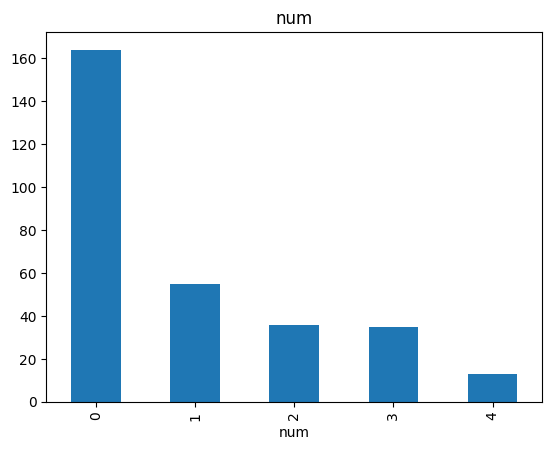

In [6]:
subset.num.value_counts().plot.bar(title='num')

<Axes: title={'center': 'Sex (1: Hombre 0: Mujer)'}, xlabel='sex'>

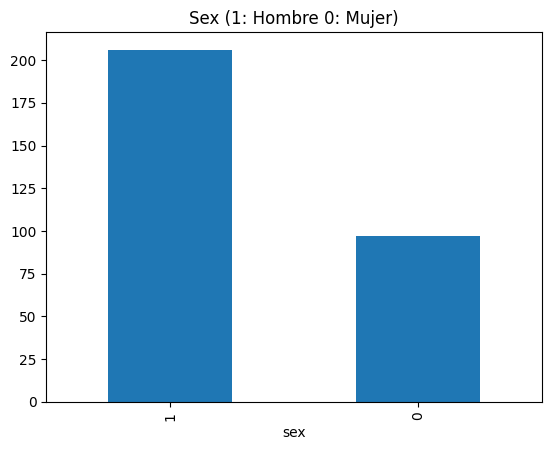

In [10]:
subset.sex.value_counts().plot.bar(title='Sex (1: Hombre 0: Mujer)')

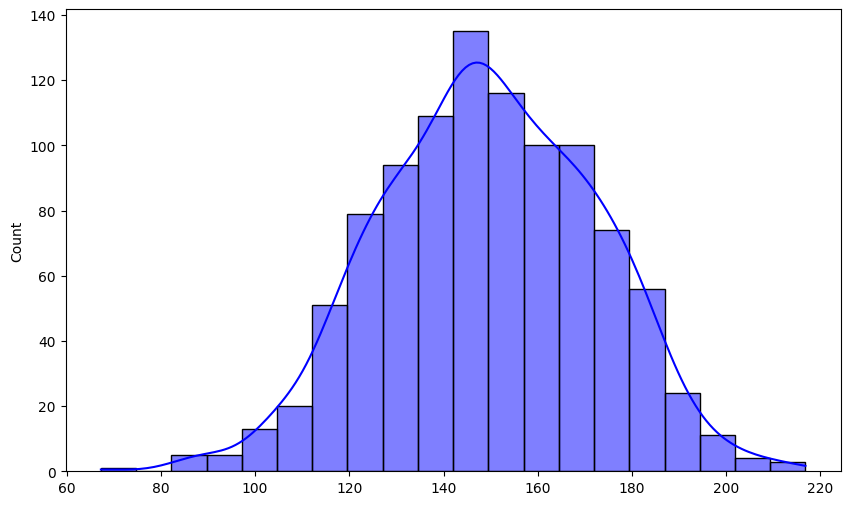

In [39]:
mean = subset.thalach.mean()
stand = subset.thalach.std()

normal = np.random.normal(mean, stand, 1000)

plt.figure(figsize=(10,6))

sns.histplot(normal, kde=True, color='blue', bins=20)

plt.show()


<Axes: title={'center': 'Grupo etario'}, xlabel='age_group'>

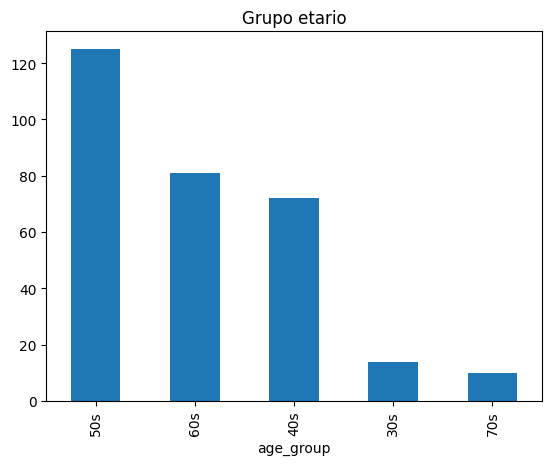

In [22]:
subset.age_group.value_counts().plot.bar(title='Grupo etario', )


### Variables Nulos
Estos son los valores nulos encontrados en el subset de datos:

In [7]:
subset.isnull().sum()

sex                      0
cp                       0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 2
risk_score               0
symptom_severity         0
risk_factor              2
avg_chol_by_age_group    1
dtype: int64

#### Tratamiento de valores nulos

**Variables:**
- **ca:**
- **thal:**
- **age_group:**
- **cholesterol_level:**
- **bp_level:**
- **risk_factor:**
- **avg_chol_by_age_group:**

### Listado de posibles dudas/preguntas al encargado de proveer los datos

## 3- Hipótesis sobre los datos
### a. Formulación de hipótesis sobre la variable target bajo determinadas condiciones

### b. Comprobación de la hipótesis


### c. Creación de nuevas variables